The goal of this notebook is to use the 9 predictors to predict the median house value (median house value). https://www.kaggle.com/harrywang/housing#housing.csv. I will preprocess data and demonstrate two purposes of inferences and predictions in this notebook.
- The goal of inferences is to estimate association between dependent variables and key predictors. 
- The goal of predictions is to pick a model that performs best at predicting outcome. 

In [4]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

import warnings # Suppress warnings
warnings.filterwarnings('ignore') 

In [5]:
# Loading housing data file. Rename the file because there is other existing housing file in the notebook.
housing = pd.read_csv('housingfinal.csv')
# Checking how the first 5 rows of data look
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
# Checking variable data types
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
# checking data shape
housing.shape

(20640, 10)

Let's start with Preprocessing Data

## 1. Preprocess Data

There are some missing values in the data set. I am going to remove the rows that contain missing values. Report the dimension of the final data set.

In [8]:
# Checking for variables with the highest missing values.
# We might be interested to see the portion of missing values.
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
# Since the missing value portion seems small, we can drop missing values and all other observations
housing = housing.dropna()

In [10]:
# Report the final total housing data observations and its dimensions
housing.shape

(20433, 10)

## 2. Inferences

### a. Build a linear regression model using all features and all observations. Perform model diagnostics. Also, suggest potential transformation(s) to the variable(s) (provide evidence, and specify which variable(s) to transform). 

#### First, build a linear regression model

In [11]:
# Dummy variable
# Counting values of variable categories. 
print(housing.ocean_proximity.value_counts())

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64


In [12]:
# Creating dummy variable for the ocean_proximity variable
ocean_dummies = pd.get_dummies(housing.ocean_proximity, drop_first = True)
housing = pd.concat([housing, ocean_dummies], axis = 1)
housing.drop(columns = 'ocean_proximity',inplace = True)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0


In [13]:
# checking a summary of statistics
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,0.317917,0.000245,0.111095,0.128615
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,0.465678,0.015641,0.314257,0.334782
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
# Defining x, y variables
X = housing.copy()
X.drop(columns = 'median_house_value', inplace = True)
y = housing.median_house_value

In [15]:
# Fit a linear regression using the statsmodels library
X_intercept = sm.add_constant(X) # adding intercept
LinearReg = sm.OLS(y, X_intercept).fit() # fitting linear regression
LinearReg.summary() # model sumary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     3112.
Date:                Wed, 03 Jun 2020   Prob (F-statistic):               0.00
Time:                        04:54:01   Log-Likelihood:            -2.5655e+05
No. Observations:               20433   AIC:                         5.131e+05
Df Residuals:                   20420   BIC:                         5.132e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -2.27e+06    8.8e+04    -25.791      0.000   -2.44e+06    -2.1e+06
longitude          -2.681e+04   1019.651    -26.296      0.000   -2.88e+04   -2.48e+04
latitude           -2.548e+04   1004.702    -25.363      0.000   -2.75e+04   -2.35e+04
housing_median_age  1072.5200     43.886     24.439      0.000     986.501    1158.540
total_rooms           -6.1933      0.791     -7.825      0.000      -7.745      -4.642
total_bedrooms       100.5563      6.869     14.640      0.000      87.093     114.019
population           -37.9691      1.076    -35.282      0.000     -40.078     -35.860
households            49.6173      7.451      6.659      0.000      35.012      64.222
median_income       3.926e+04    338.005    116.151      0.000    3.86e+04    3.99e+04
INLAND             -3.928e+04   1744.258    -22.522      0.000   -4.27e+04   -3.59e+04
ISLAND              1.529e+05   3.07e+04      4.974      0.000    9.26e+04    2.13e+05
NEAR BAY           -3954.0516   1913.339     -2.067      0.039   -7704.350    -203.753
NEAR OCEAN          4278.1343   1569.525      2.726      0.006    1201.739    7354.530
==============================================================================
Omnibus:                     5049.292   Durbin-Watson:                   0.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19123.138
Skew:                           1.197   Prob(JB):                         0.00
Kurtosis:                       7.090   Cond. No.                     7.24e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Second, I am going to do model diagnostics

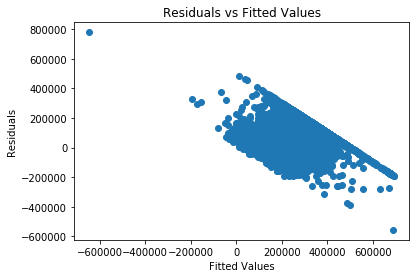

In [16]:
# Visualize reduduals and fited values
plt.scatter(LinearReg.fittedvalues, LinearReg.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

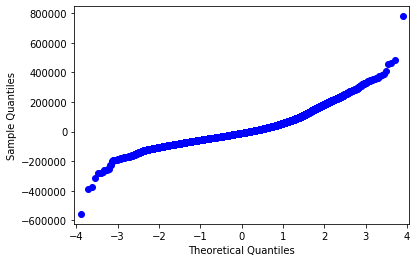

In [17]:
# QQ Plot
qqplot = sm.qqplot(LinearReg.resid)

- R_squared (0.646)tells us that 64.6% of the variability of out model was captured by the linear line. It is acceptable.
- P_values of all coeffients appears statistically significant. There are relationships between independent variables and dependent one. 

To check linear model assumptions we look at the following points. 
- Linearity and Homoscedasticity: There is a same range in the residuals plot accept a small portion of outliners. This tells that linearity between independent and dependent variable is satisfied. 
- Normality of Residuals: The qqplot shows a relatively straight line, which is an indication that normality of residuals is satisfied.
We can improve this model by removing outliners. 

#### Third, we suggest potential transformation(s) to the variable(s) (provide evidence, and specify which variable(s) to transform).

Data skewness of 1.197 in OLS Regression Results tells us that the data is skewed right. Data distribution is not normal. In order to solve this problem, we need data transformation. However, let examinate which variables are needed to transform.

(array([12.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.56414287e-02, 1.15435808e+04, 2.30871459e+04, 3.46307111e+04,
        4.61742762e+04, 5.77178414e+04, 6.92614065e+04, 8.08049717e+04,
        9.23485368e+04, 1.03892102e+05, 1.15435667e+05]),
 <a list of 10 Patch objects>)

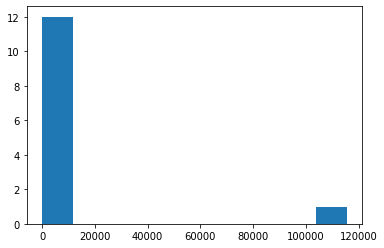

In [18]:
# We need to scale the data because the below histogram shows some large standard deviations
plt.hist(housing.std())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a26af2d50>]],
      dtype=object)

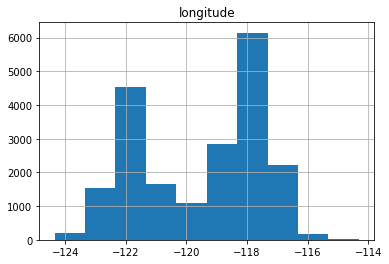

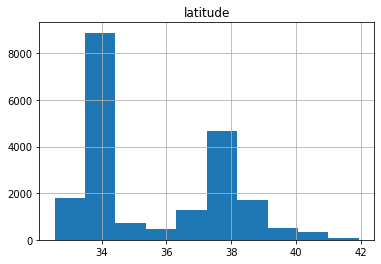

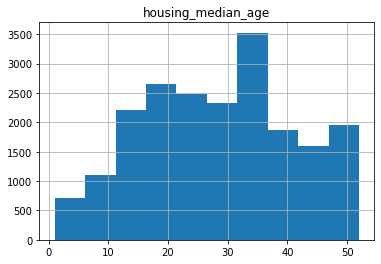

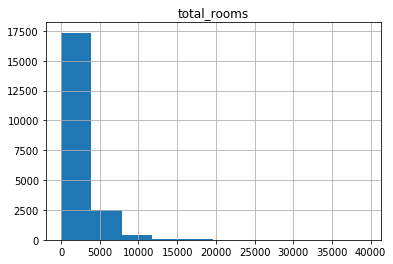

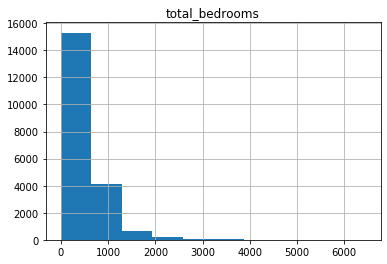

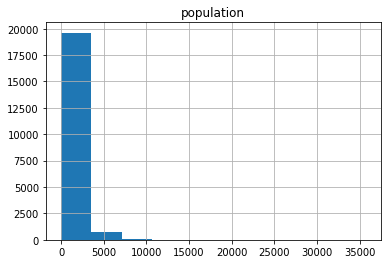

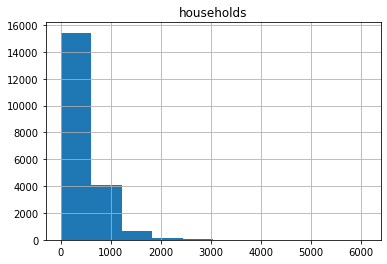

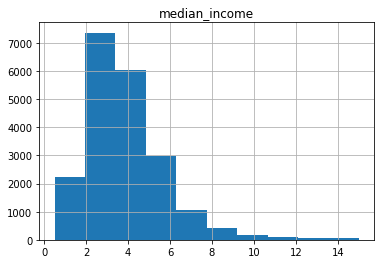

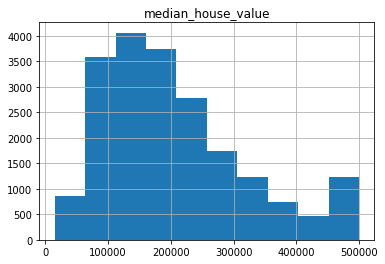

In [25]:
# Visualize variables by ploting histograms to see which one is skew.
housing.hist(column = 'longitude')
housing.hist(column = 'latitude')
housing.hist(column = 'housing_median_age')
housing.hist(column = 'total_rooms')
housing.hist(column = 'total_bedrooms')
housing.hist(column = 'population')
housing.hist(column = 'households')
housing.hist(column = 'median_income')
housing.hist(column = 'median_house_value')

Total_rooms, total_bedrooms, population, households, median_income are right skewed. They are needed nonlinear transformation by taking log to make them symmetric. Below is the link provide infomation how to do preprocessing data. https://scikit-learn.org/stable/modules/preprocessing.html

For future actions, we would check model assumtions again after transforming data. We can aslo do some sensitivity in different notebooks to check the association. 

### b. Create a new variable called median house category. This variable consists of 0 and 1, where 0 if median house value is less than or equal to it’s median value, and 1 otherwise.

In [17]:
# Coppy housing data frame to create new y_cat categorical variable
house_logit = housing.copy()
#add a dummy variable '0' and '1' called median_house_category
house_logit['median_house_category']=np.where(house_logit['median_house_value'] <= (np.median(house_logit['median_house_value'])),0,1) 
house_logit.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_category
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0,1


In [18]:
# Delete the median_house_value variable 
del house_logit['median_house_value']
# Checking median house category variable
house_logit['median_house_category'].value_counts()

0    10217
1    10216
Name: median_house_category, dtype: int64

The output data equally distributes. Classes are balanced.

In [19]:
# Defining y categorical variable
y_cat = house_logit['median_house_category']

### c. Build a logistic regression model using all features and all observations. I am going to provide interpretations to the following predictors: longitude, housing median age, and population.

In [20]:
# Fit a logistic regression model
X_int = sm.add_constant(X)
LogisticReg = sm.Logit(y_cat,X_int).fit() # fit the logistic regression 

# Model summary
LogisticReg.summary()

         Current function value: 0.362636
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                             Logit Regression Results                            
=================================================================================
Dep. Variable:     median_house_category   No. Observations:                20433
Model:                             Logit   Df Residuals:                    20420
Method:                              MLE   Df Model:                           12
Date:                   Wed, 20 May 2020   Pseudo R-squ.:                  0.4768
Time:                           19:28:52   Log-Likelihood:                -7409.7
converged:                         False   LL-Null:                       -14163.
Covariance Type:               nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -115.0910      4.829    -23.831      0.000    -124.556    -105.626
longitude             -1.2786      0.057    -22.429      0.000      -1.390      -1.167
latitude              -1.2057      0.058    -20.686      0.000      -1.320      -1.091
housing_median_age     0.0245      0.002     12.573      0.000       0.021       0.028
total_rooms           -0.0002   3.77e-05     -5.895      0.000      -0.000      -0.000
total_bedrooms         0.0028      0.000      8.669      0.000       0.002       0.003
population            -0.0014   5.75e-05    -24.146      0.000      -0.002      -0.001
households             0.0027      0.000      7.691      0.000       0.002       0.003
median_income          1.2411      0.024     50.744      0.000       1.193       1.289
INLAND                -1.2714      0.080    -15.887      0.000      -1.428      -1.115
ISLAND                22.7913    6.1e+04      0.000      1.000    -1.2e+05     1.2e+05
NEAR BAY              -0.7287      0.080     -9.112      0.000      -0.885      -0.572
NEAR OCEAN            -0.4246      0.065     -6.533      0.000      -0.552      -0.297
======================================================================================
"""

In [21]:
# Exponential of coeficients 
print('The longitute coefficient:', np.exp(-1.2786))
print('The housing_median_age coefficient:', np.exp(0.0245))
print('The population coefficient:', np.exp(-0.0014))

The longitute coefficient: 0.2784268252775833
The housing_median_age coefficient: 1.0248025911071987
The population coefficient: 0.9986009795428267


#### Interpretations to the following predictors: longitude, housing median age, and population

1. The longitute coefficient is -1.2786 and exp(-1.2786) is 0.2784. For every increase in degree of longitute (closer to the coast) in California, the odds of median house value above its median decrease by 72.16%.
2. The housing_median_age coefficient is 0.0245 and exp(0.0245) is 1.0248. For every increase in housing median age in California, the odds of median house value above its median increase by 2.48%.
1. The population coefficient is -0.0014 and exp(-0.0014) is 0.9986. For every increase in population in California, the odds of median house value above its median decrease by 0.14%.

## 3. Predictions

### a. Split data into training and holdout set. Use a split of 80-20 ratio. 

### Train / validation / test split
I am going to find the best hyperparameter of alpha, max_iter and tol by the following steps:
- Set up range of hyperparameters
- Loop them in a Lasso function
- Fit the function in the train set
- Find the minimum of MSE on valid set to pick the best set of hyper-parameter
- Use the best one fit on holdout set to get final MSE for this method

In [22]:
# importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import itertools # For creating iterators for efficient looping

# Train valid and holdout set splits using 20% of the data set as a holdout set
X_train_valid, X_holdout, y_train_valid, y_holdout = train_test_split(X, y, test_size = 0.2, random_state = 451)
# Train valid sets splits using 25% of the training set as validation set
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size = 0.25, random_state = 451)

# Creating a range of elements of the hyperparameters
alphas = np.linspace(0.0001,5,10) # power of penalty on coefficients
max_iter = np.linspace(50,500,10) # number of iterations
tol = np.linspace(0.0001,0.1,10) # tol: tolerance for the stopping criteria once some tolerance is achieved or close
# cartesian product
hyperparameters = list(itertools.product(alphas,max_iter,tol)) 

### b. Build a Lasso regression model and Random Forest Regression model using the training set to predict the house median value variable. Perform prediction on the testing set. Report the MSE.

### • I am going to tune at least 2 hyperparameters for each model and using the train/validation/test split method.

In [23]:
# Lasso Model 
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Scaling X data
scaler = StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
X_valid_transformed = scaler.transform(X_valid)

Validation_mse = [] # create 'basket' for validation MSE
# Looping over each tuple of hyperparameters
for index, tupl in enumerate(hyperparameters):
    Lass_model = Lasso(alpha = tupl[0], max_iter = tupl[1], tol = tupl[2])
    Lass_model.fit(X_train_transformed, y_train) # fit Lasso model 
    prediction = Lass_model.predict(X_valid_transformed) # call predict function
    Validation_mse.append(mean_squared_error(prediction, y_valid)) # validate mse on a valid set

In [24]:
# Printing the best hyperparameters
best_set = hyperparameters[np.argmin(Validation_mse)]
print(best_set)

(0.0001, 100.0, 0.0001)


Next, use the train_valid set, scale it, refit the model using the best set of hyperparameters from above and perform prediction on the holdout set. 

In [25]:
# Perform scaling on the train_valid and holdout set
scaler = StandardScaler().fit(X_train_valid)
X_train_valid_transformed = scaler.transform(X_train_valid)
X_holdout_transformed = scaler.transform(X_holdout)

# Fitting Lasso model with the best set of hyperparameters on the train_valid test
Lass_model1 = Lasso(alpha = best_set[0], max_iter=best_set[1], tol=best_set[2])# Define the regression model
Lass_model1.fit(X_train_valid_transformed, y_train_valid) # fit Lasso model on transformed train valid set

predictions = Lass_model1.predict(X_holdout_transformed) # call prediction
Evaluation_Lass = mean_squared_error(predictions, y_holdout) # validate mse on a holdout set

print(Evaluation_Lass) # print MSE of Lasso model

4821380589.854102


In [26]:
# Random Forest Regression Model 
from sklearn.ensemble import RandomForestRegressor # because the output is numberical data type

# Creating a range of elements of the hyperparameter
n_estimators = range(1,15) #Number of trees in this forest
min_samples_leaf = range (3,7) #Minimum number of observations at each terminal node

# cartesian product
hyperparameters_rf = list(itertools.product(n_estimators,min_samples_leaf))

Validation_mse_rf = [] # create 'basket' for validation MSE
# Looping over each tuple of hyperparameters
for ind, tup in enumerate(hyperparameters_rf):
    RF_model = RandomForestRegressor(n_estimators = tup[0], min_samples_leaf = tup[1]) # define Random Forest model
    RF_model.fit(X_train, y_train) # fit model on train set
    prediction = RF_model.predict(X_valid) # call prediction function
    Validation_mse_rf.append(mean_squared_error(prediction, y_valid)) # appending mse in the above 'basket'

In [27]:
# Printing the best hyperparameters
best_set_rf = hyperparameters_rf[np.argmin(Validation_mse_rf)]
print(best_set_rf)

(13, 4)


In [28]:
# Fitting random forest model with the best set of hyperparameters on the train_valid test
RF_model1 = RandomForestRegressor(n_estimators = tup[0], min_samples_leaf = tup[1])# Define the random forest regression model
RF_model1.fit(X_train_valid, y_train_valid) # fit model on train valid set

predictions_rf = RF_model1.predict(X_holdout) # predict on holdout set
Evaluation_RF = mean_squared_error(predictions_rf, y_holdout)
print(Evaluation_RF) # print MSE of Random Forest model

2637656828.4857025


### c. Compare the predictors selected by the two final models. Briefly describe the observations.

In [29]:
# Report the important features from both models
importance = pd.DataFrame({'features':X.columns.values, 'importance_Lasso':np.absolute(Lass_model1.coef_), 
             'importance_RandomForest': RF_model1.feature_importances_})
importance.sort_values(by = ['importance_Lasso'], ascending = False)

,features,importance_Lasso,importance_RandomForest
7,median_income,74729.746741,0.522867
1,latitude,55237.313352,0.098166
0,longitude,54725.501647,0.103648
4,total_bedrooms,43281.563406,0.013214
5,population,40958.794815,0.021447
8,INLAND,18134.796945,0.158309
6,households,16581.179881,0.011347
3,total_rooms,13764.560206,0.014546
2,housing_median_age,13529.674173,0.046122
9,ISLAND,2678.282692,0.000000


Median_income and latitude are the most importance variables in both models. With the goal of predictions, the Random Forest model is much more favorable to use because of its low MSE compared to the Lasso model.

### d. Build a KNN classifier, decision tree, and boosted tree, to predict the house median category variable. Perform prediction on the testing set. Report the precision score.
### • I am going to tune at least 2 hyperparameters for each model and using cross validation. • Using the precision score to evaluate model.

In [30]:
# output is categorical data type, so import necessary classifier libraties 
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score # Evaluation on precision score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [31]:
# Train valid and holdout set splits using 20% of the data set as a holdout set for the house median category variable
X_train_valid_cat, X_holdout_cat, y_train_valid_cat, y_holdout_cat = train_test_split(X, y_cat, test_size = 0.2, random_state = 451)
# Train valid sets splits using 25% of the training set as validation set for the house median category variable
X_train_cat, X_valid_cat, y_train_cat, y_valid_cat = train_test_split(X_train_valid_cat, y_train_valid_cat, test_size = 0.25, random_state = 451)

### KNN Classifier

We will use 5 fold cross validation for all KNN classifier, Decision Tree and Boosted Trees.

In [32]:
# Seting up pipeline
estimator = Pipeline(steps = [('scale', StandardScaler()), # Scale data
                     ('knn', KNeighborsClassifier()) ])
# Seting up parameter
parameters = {'knn__n_neighbors': range(5,20),
             'knn__p': [1,2]} # consider only manhattan_distance (l1) or euclidean_distance (l2)
# Set up the cross validation
knn1 = GridSearchCV(estimator = estimator, param_grid = parameters, cv = 5, 
                   scoring = 'precision', n_jobs = -1)
knn1.fit(X_train_valid_cat, y_train_valid_cat)
print(knn1.best_params_)

{'knn__n_neighbors': 6, 'knn__p': 1}


In [33]:
# Scaling data
scaler = StandardScaler().fit(X_train_valid_cat)
X_train_valid_cat = scaler.transform(X_train_valid_cat)
X_holdout_cat = scaler.transform(X_holdout_cat)

# Fiting KNN with the best parameter
knn2 = KNeighborsClassifier(n_neighbors = knn1.best_params_['knn__n_neighbors'], p = knn1.best_params_['knn__p'])
knn2.fit(X_train_valid_cat, y_train_valid_cat)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=1,
                     weights='uniform')

In [34]:
# Perform evaluation on the holdout set. Report the final precision score.
precision_knn = precision_score(knn2.predict(X_holdout_cat), y_holdout_cat)
print('Precision of KNN:', precision_knn)

Precision of KNN: 0.8087512291052114


### Decision Tree

In [35]:
# Tuning tree 
# Set up parameters
parameters_DeTree = {'max_depth':np.arange(2, 5), 
                     'max_leaf_nodes': np.arange(10, 50),
                     'ccp_alpha': np.linspace(0.005,0.5,20)}
# Set up the cross validation
DeTree1 = GridSearchCV(DecisionTreeClassifier(random_state = 451),parameters_DeTree, scoring ='precision',
                          cv = 5, n_jobs = -1)
DeTree1.fit(X_train_valid_cat, y_train_valid_cat)
print(DeTree1.best_params_)

{'ccp_alpha': 0.005, 'max_depth': 2, 'max_leaf_nodes': 10}


In [36]:
# Fiting Decision with the best parameter
DeTree2 = DecisionTreeClassifier(max_depth = DeTree1.best_params_['max_depth'], max_leaf_nodes = DeTree1.best_params_['max_leaf_nodes'],
                                 ccp_alpha = DeTree1.best_params_['ccp_alpha'],random_state = 451)
DeTree2.fit(X_train_valid_cat, y_train_valid_cat)

DecisionTreeClassifier(ccp_alpha=0.005, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=451, splitter='best')

In [37]:
# Perform evaluation on the holdout set. Report the final precision score.
precision_DeTree = precision_score(DeTree2.predict(X_holdout_cat), y_holdout_cat)
print('Precision of Decision Tree:', precision_DeTree)

Precision of Decision Tree: 0.5476892822025565


### Boosted Trees

In [38]:
# Tuning Booted Trees
# Set up parameters
parameters_BootedTree = {'n_estimators': np.linspace(100, 600, 10, dtype = int), # number of trees
                         'learning_rate': np.linspace(0.01,0.1,10)} # setting how fast learning rate is.
# Set up the cross validation
BootedTree1 = GridSearchCV(GradientBoostingClassifier(max_depth = 2, max_leaf_nodes = 10, random_state = 451),
                    param_grid = parameters_BootedTree, cv = 5, n_jobs = -1, scoring = 'precision')
BootedTree1.fit(X_train_cat, y_train_cat)
print(BootedTree1.best_params_)

{'learning_rate': 0.1, 'n_estimators': 600}


In [39]:
# Fiting a Boosted Tree with the best parameter
BoostedTree2 = GradientBoostingClassifier(max_depth = 2, max_leaf_nodes = 7, random_state = 451,
                                          learning_rate = BootedTree1.best_params_['learning_rate'], 
                                          n_estimators = BootedTree1.best_params_['n_estimators'])
BoostedTree2.fit(X_train_valid_cat, y_train_valid_cat)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=7,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=600,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=451, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [40]:
# Perform evaluation on the holdout set. Report the final precision score.
precision_BoostedTree = precision_score(BoostedTree2.predict(X_holdout_cat), y_holdout_cat)
print('Precision of Boosted Trees:', precision_BoostedTree)

Precision of Boosted Trees: 0.880039331366765


Higher percision score indicates better the model makes a positive prediction. The Boosted Trees model has the highest precision score, KNN classifier and Decision Tree. KNN model takes esimatively shorter time to finish, but it performance is not bad with only about 7% in score difference.

There is no surprise that Decision Tree does not perform well. One thing to notice, the ccp_alpha parameter plays ipportant rules in applying decision tree and boosted trees model. My tries on this notebook show higher ccp_alpha, the tree structure becomes simpler and precision score decrease. 

Predicting correctly above median of median values of houses could benifit sellers and real estate agents. It is depends on applications to make decision about which hyperparameters to tune.

Note: Boosted trees model can not have a single tree. The reason is the model trains on weak decision tree sequentily at each iteration and finalize with an ensemble of trees to make decisions. 

## 4. PCA

### a. Reload the original data set, drop the missing obsevations and convert the categorical variable(s) into dummy variables (do not drop anything).

In [41]:
# For PCA, we care about X, not y.
# Reload original data set
House = pd.read_csv('housingfinal.csv')

# Drop the missing values
House = House.dropna()
House.shape

(20433, 10)

In [42]:
# Define the predictors and response
X_PCA = House.drop('median_house_value', axis =1)
y_PCA = House.median_house_value

In [43]:
# convert the categorical variable(s) into dummy variables without dropping anything
X_PCA = pd.get_dummies(X_PCA)
X_PCA.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0


### b. Perform PCA and plot the scree plot.

(array([9., 2., 0., 0., 0., 1., 0., 0., 0., 1.]),
 array([1.56414287e-02, 2.18541034e+02, 4.37066427e+02, 6.55591819e+02,
        8.74117212e+02, 1.09264260e+03, 1.31116800e+03, 1.52969339e+03,
        1.74821878e+03, 1.96674417e+03, 2.18526957e+03]),
 <a list of 10 Patch objects>)

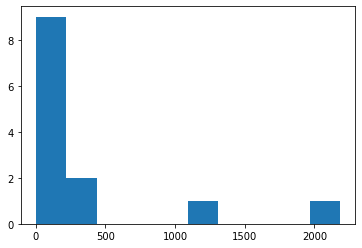

In [44]:
# Ploting standard deviation
plt.hist(X_PCA.std())

It looks like we have some large standard deviations. In this case, we should also scale the data.

In [45]:
from sklearn.decomposition import PCA
# Scaling data
X_scale = StandardScaler().fit_transform(X_PCA)

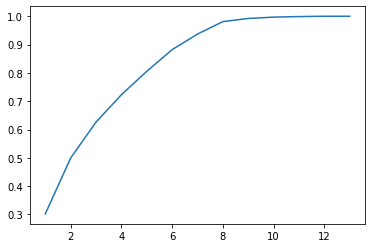

In [46]:
# Ploting scree plot
pca_all = PCA().fit(X_scale)
plt.plot(range(1, 14), np.cumsum(pca_all.explained_variance_ratio_))

### c. How many principal components do you need to cover 90% variability?

In [47]:
pca1= PCA(0.9).fit(X_scale)
X_trans = pca1.transform(X_scale)
X_trans.shape

(20433, 7)

We need 7 principle components to cover 90% variability. This makes the model is much simpler in a very short running time compared to the above Lasso regression. 

In conclusion, in order to choose models we have to be clear about: 
- Our purposes of inferences or predictions
- Data's distribution, scales, data types to decide what we need to do in preprocessing data
- Models' assumptions and evaluation methods depending on real life applications
- Pros and cons of each models
- Choices of tunning hyperparameters, their variance and bias trade-offs and their effects on each models
- Estimated time each model runs 